In [2]:
using Plots

Equation of two lines are y = mx + c1 and y = mx + c2

In [3]:
m = (-1+sqrt(5))/2
c1 = 1
c2 = 5

function line_down(x::Float64)
    return c1 + m*x
end

function line_up(x::Float64)
    return c2 + m*x
end

line_up (generic function with 1 method)

In [4]:
b=1;
N_x = 16;

points_x_array = range(b, N_x*b,N_x)
points_y_array = range(b, N_x*b,N_x)

points2 = zeros(2*N_x^2)
for ii = 1:N_x
    for jj = 1:N_x
        points2[2*((jj-1)*N_x+ii)-1] = points_x_array[ii]
        points2[2*((jj-1)*N_x+ii)] = points_y_array[jj]
    end
end


### These arrays have N^2 elements, and hold the x and y coordinates of nth site
points_x_array = points2[1:2:end]
points_y_array =  points2[2:2:end]

site_index = range(1,N_x^2, N_x^2)

1.0:1.0:256.0

### Now we isolate the PTB points

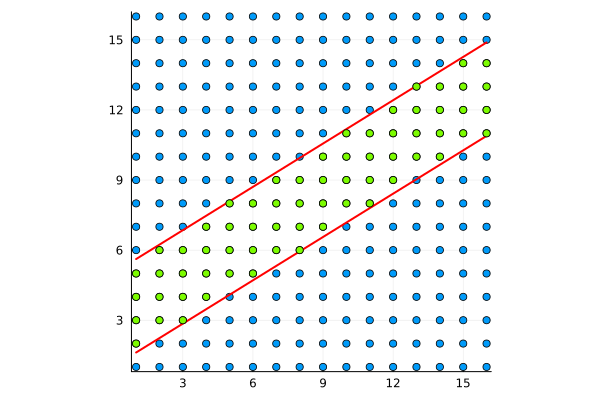

In [11]:
### PTB_index will contain ordered indices of the sites in PTB

PTB_index_dummy = collect(range(1,N_x^2,N_x^2))
for ii = 1:N_x^2
    if (points_y_array[ii] >= line_down(points_x_array[ii])) && (points_y_array[ii] <= line_up(points_x_array[ii]))
        ## Do nothing
    else
        PTB_index_dummy[ii] = 0.0
    end
end

## Here we store non-zero indices
PTB_index = findall(!iszero, PTB_index_dummy)

N_PTB = size(PTB_index)[1]

points_PTB_array_x = zeros(N_PTB)
points_PTB_array_y = zeros(N_PTB)

for ii = 1:N_PTB
    points_PTB_array_x[ii] = points_x_array[PTB_index[ii]]
    points_PTB_array_y[ii] = points_y_array[PTB_index[ii]]
end

### Draw lines separating PTB
line_x = [1.0,N_x*b]
line_down_y = line_down.(line_x)
line_up_y = line_up.(line_x)

plt_lattice=scatter(points_x_array, points_y_array,aspect_ratio=1,legend=false, xlims=[0.8,N_x*b+0.2], ylims=[0.8,N_x*b+0.2])
plt_lattice=plot!(line_x,line_down_y,color="red",width=2)
plt_lattice=plot!(line_x,line_up_y,color="red",width=2)
plt_lattice=scatter!(points_PTB_array_x, points_PTB_array_y,color="lawngreen",aspect_ratio=1,legend=false)

In [6]:
println("Number of sites in PTB = ",N_PTB)
println("Amount of sites in PTB = ",100* N_PTB/N_x^2, " %")

Number of sites in PTB = 64
Amount of sites in PTB = 25.0 %


In [10]:
println(PTB_index)

[17, 33, 34, 35, 49, 50, 51, 52, 65, 66, 67, 68, 69, 70, 82, 83, 84, 85, 86, 87, 88, 100, 101, 102, 103, 104, 105, 117, 118, 119, 120, 121, 122, 123, 135, 136, 137, 138, 139, 140, 153, 154, 155, 156, 157, 158, 170, 171, 172, 173, 174, 175, 176, 188, 189, 190, 191, 192, 205, 206, 207, 208, 223, 224]
